In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../assets/csv-files/suscription.csv")
dataset.head(3)

,Age,Salary,Purchase
0,22,33915,0
1,24,39183,0
2,32,54504,1


In [3]:
# Check for null values
dataset.isnull().sum() # No null values

Age         0
Salary      0
Purchase    0
dtype: int64

In [4]:
# Seperate dependent and independent variables
x = dataset.iloc[:, :-1]
y = dataset["Purchase"]

In [5]:
# Scaling our data
from sklearn.preprocessing import StandardScaler

In [6]:
stdsc = StandardScaler()
stdsc.fit(x)
x = pd.DataFrame(stdsc.transform(x), columns=x.columns)
x.head(3)

,Age,Salary
0,-0.918976,-0.249102
1,-0.662994,0.109308
2,0.360935,1.151675


In [7]:
# Train test split
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier # Classification model

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
dtc.score(x_test, y_test)

0.98

In [12]:
dtc.predict([[19, 19000]])

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [13]:
# Visualization of decision region
from mlxtend.plotting import plot_decision_regions

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


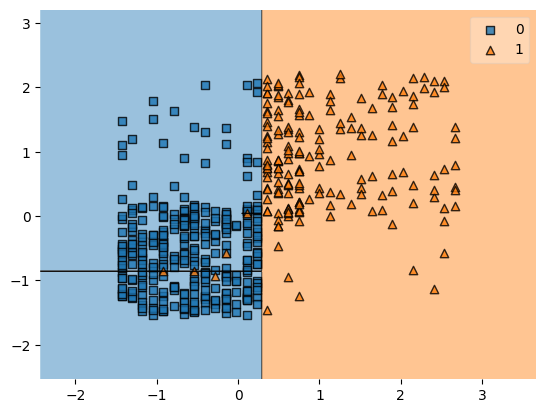

In [14]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dtc)
plt.show()

In [15]:
# Visualization of decision tree
from sklearn.tree import plot_tree

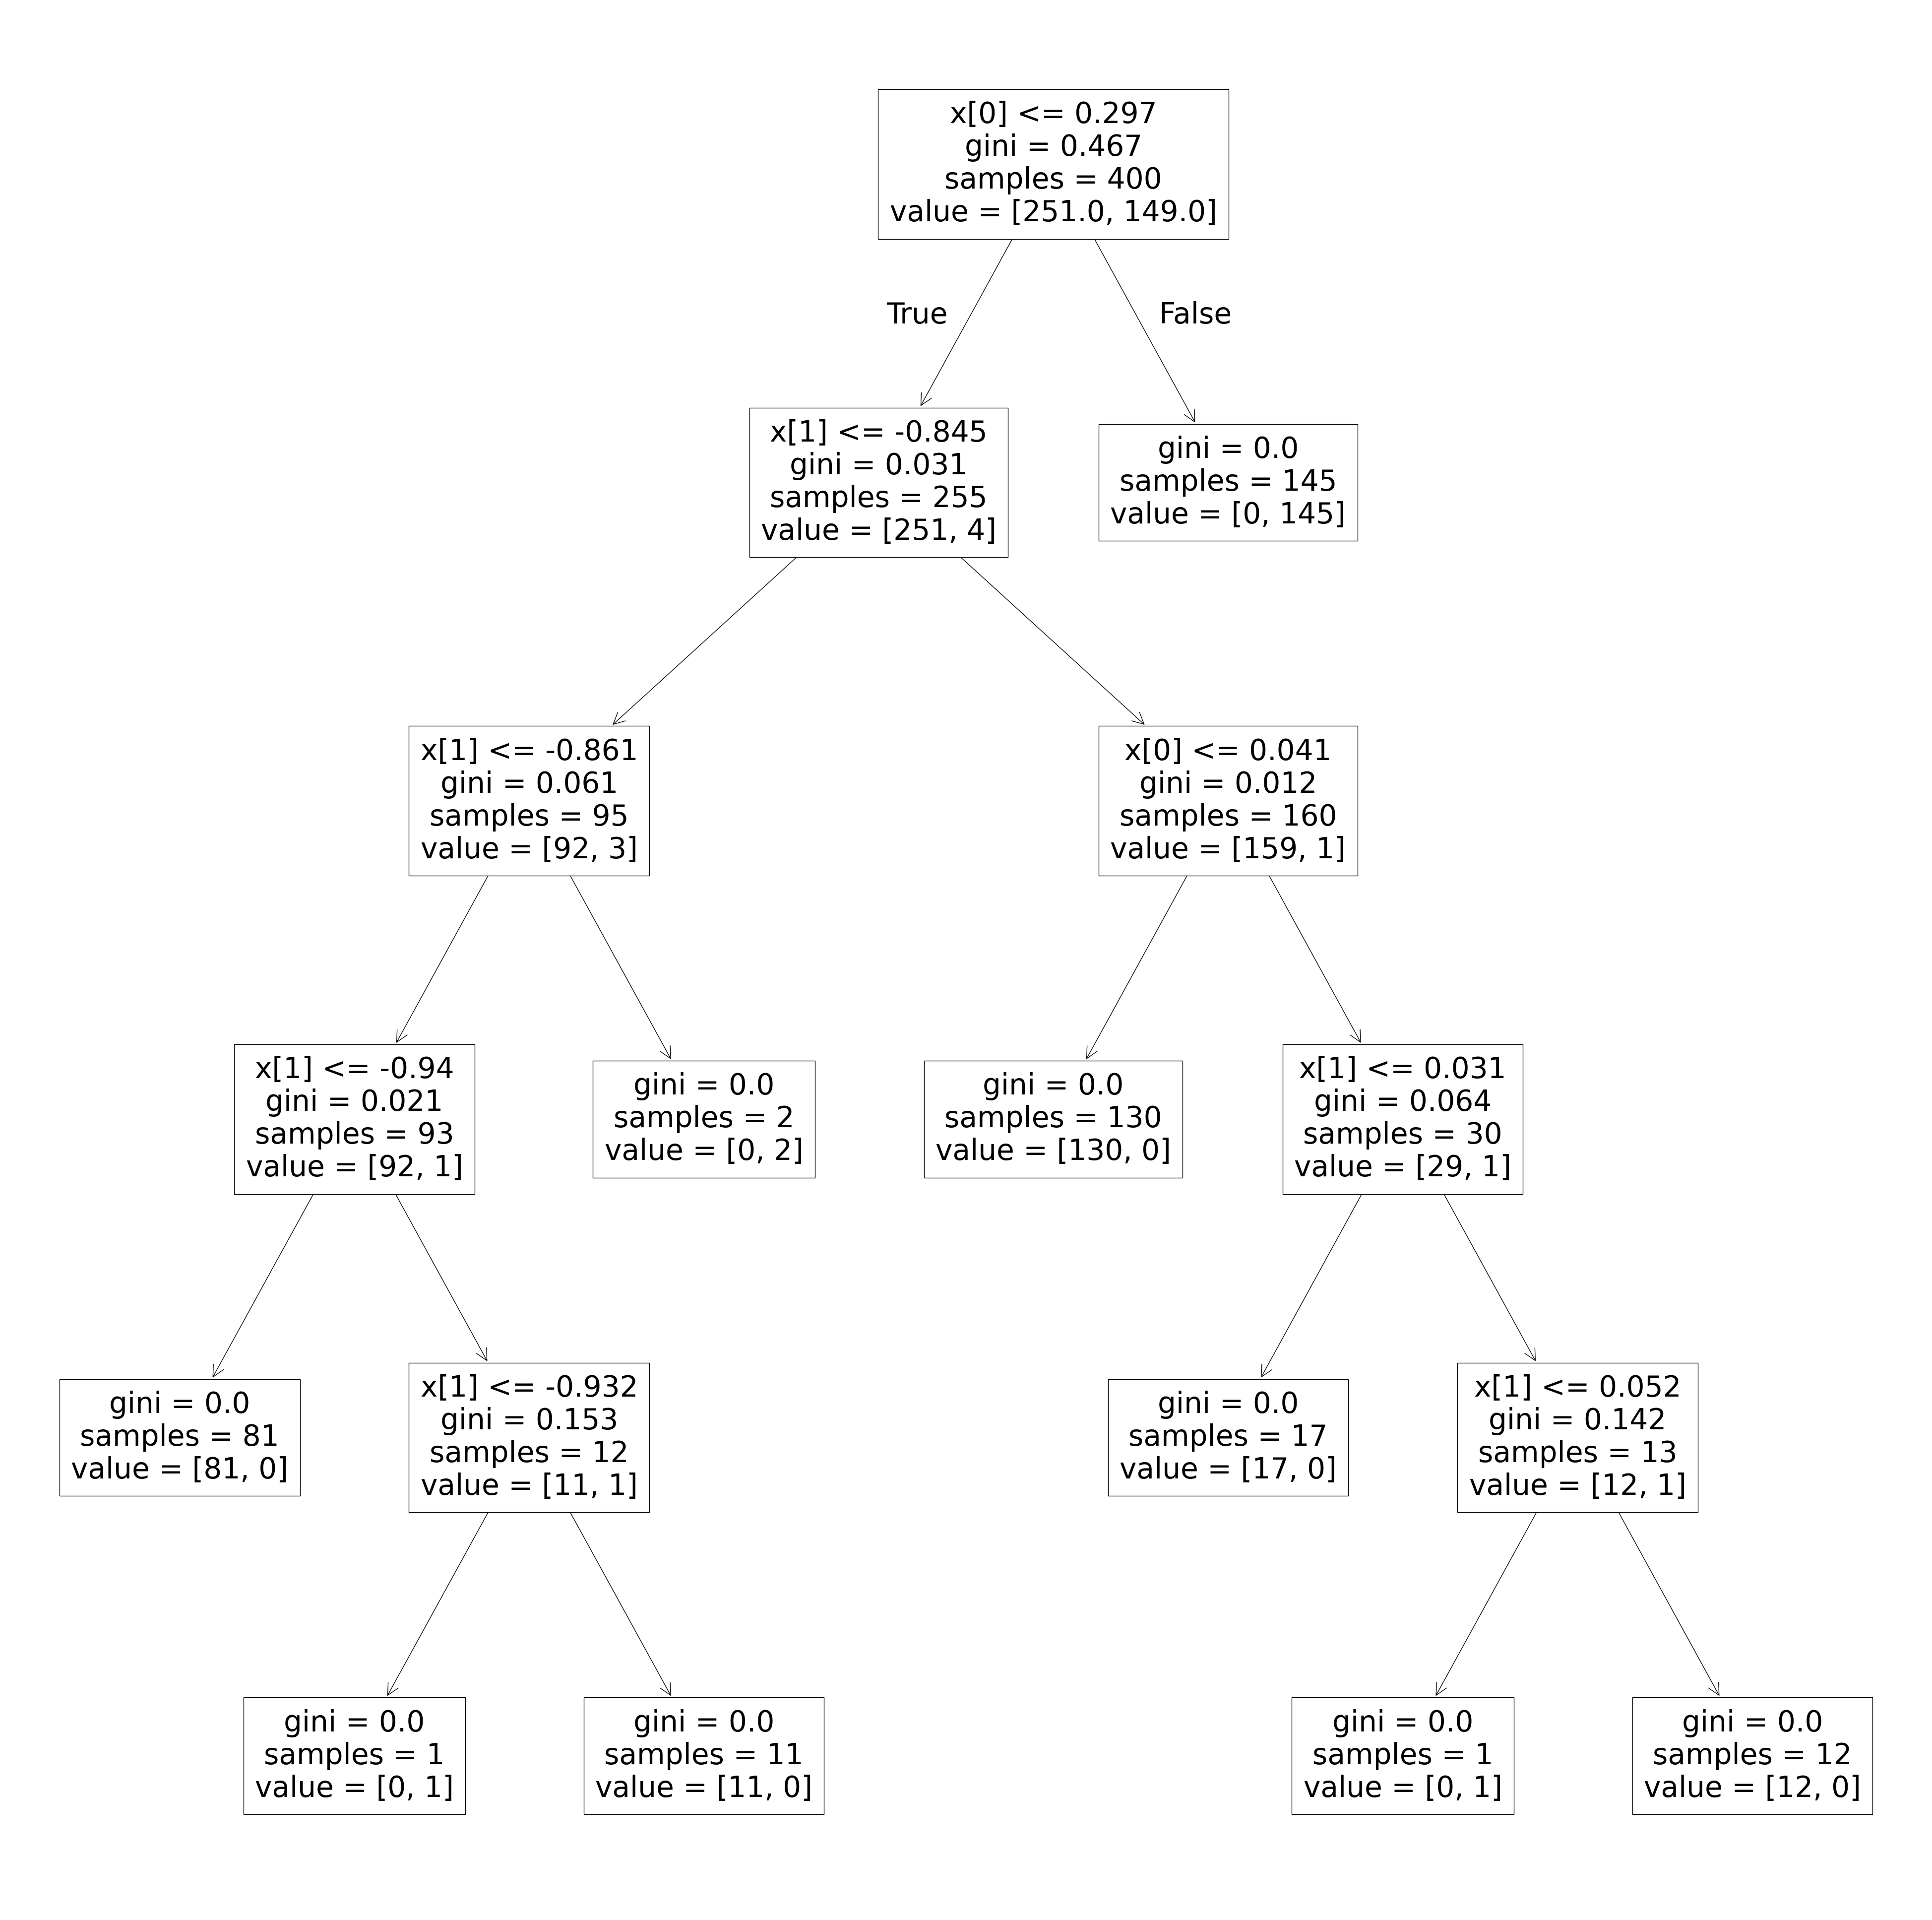

In [16]:
plt.figure(figsize=(50, 50))
plot_tree(dtc)
plt.savefig("decision-tree.jpg")
plt.show()

#### Handling Overfitting
Over fitting can be handled by either pre-pruning or post-pruning

In [17]:
# Check if the model is overfitted
dtc.score(x_train, y_train), dtc.score(x_test, y_test)
# Huge difference in score between training and testing data means it is overfitted

(1.0, 0.98)

#### Pre-Pruning
In pre-pruning the max_depth is set while creating an object of DecisionTreeClassifier class.

In [18]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
dtc.score(x_train, y_train), dtc.score(x_test, y_test)
# Less difference is seen now

(0.995, 0.99)

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


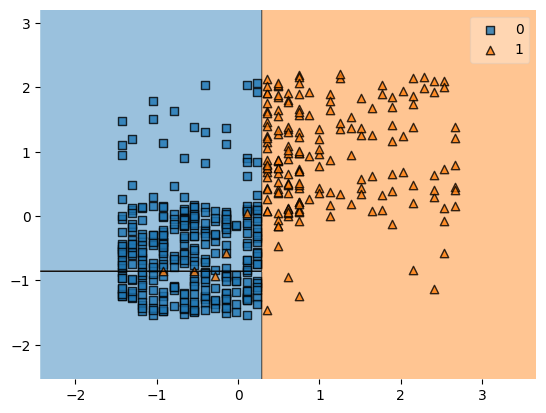

In [20]:
# Visualization of decision region
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dtc)
plt.show()

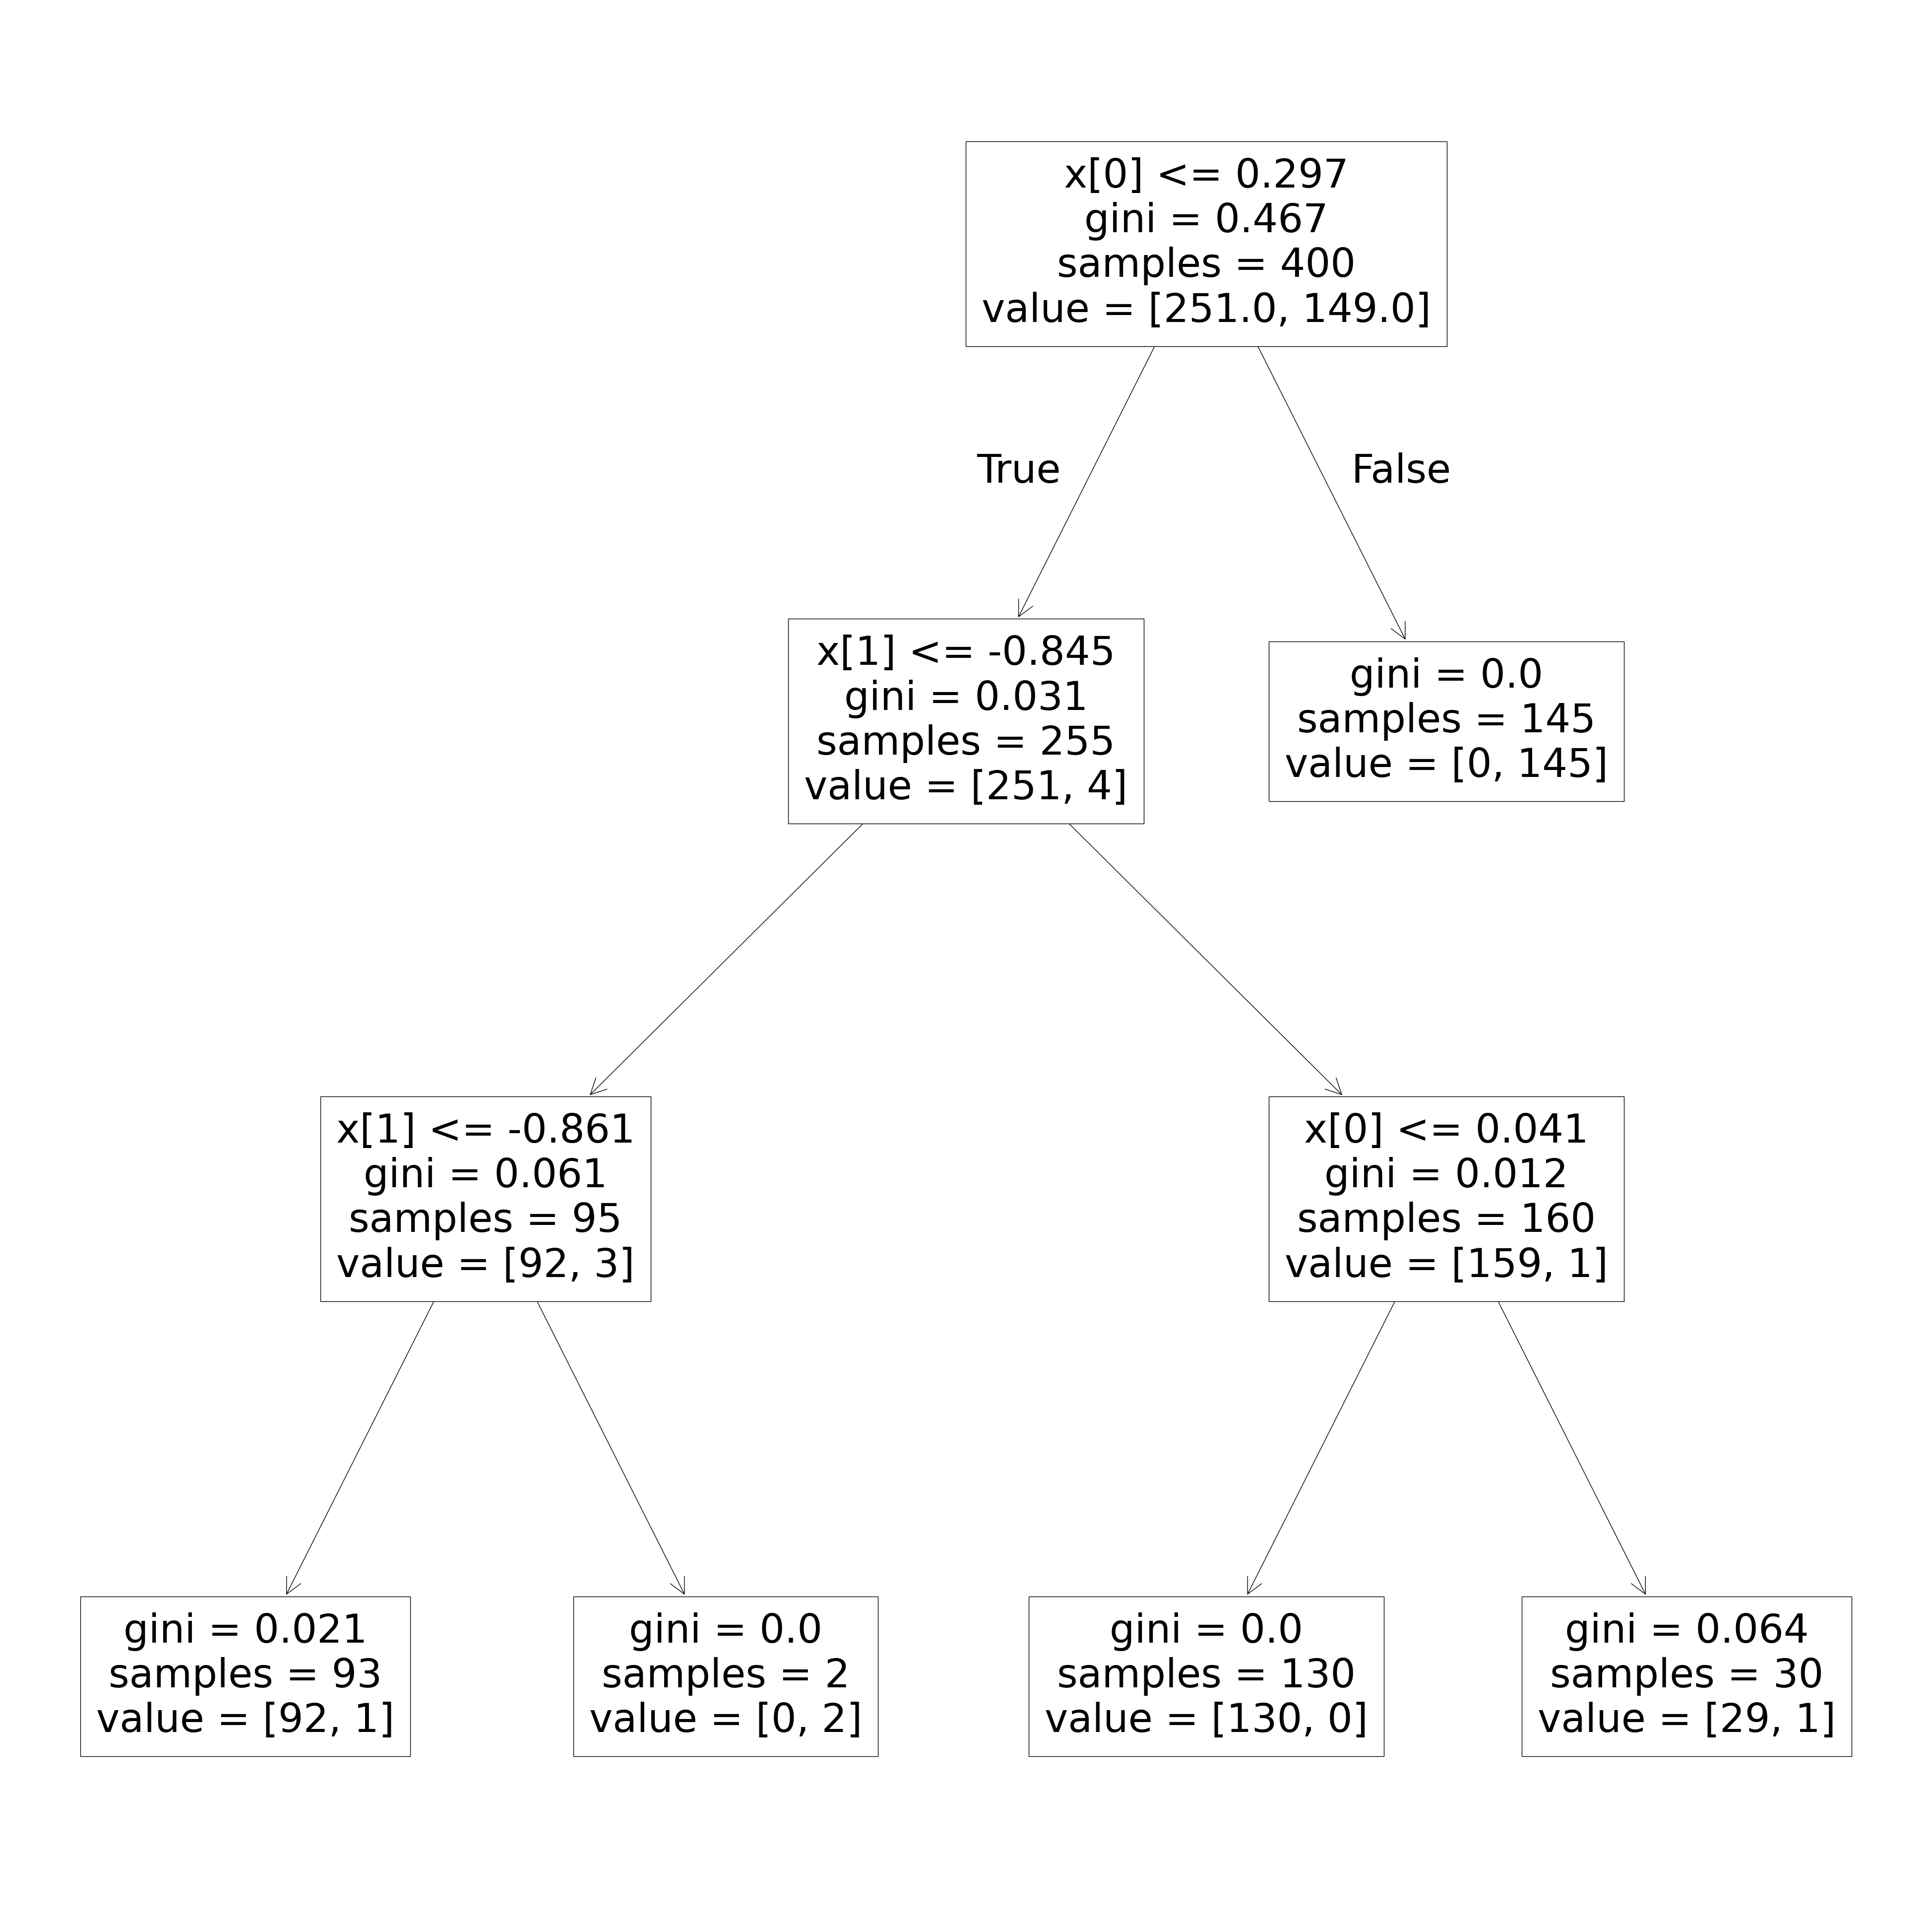

In [21]:
# Visualization of decision tree
plt.figure(figsize=(50, 50))
plot_tree(dtc)
plt.show()

#### Post-Pruning
It first finds the best max_depth by the training model to different depths and then train the model to the selected max_depth.

In [22]:
# Find the best max_depth
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train, y_train)
    print(dtc.score(x_train, y_train), dtc.score(x_test, y_test), i)

0.99 0.99 1
0.99 0.99 2
0.995 0.99 3
0.995 0.99 4
1.0 0.98 5
1.0 0.98 6
1.0 0.98 7
1.0 0.98 8
1.0 0.98 9
1.0 0.98 10
1.0 0.98 11
1.0 0.98 12
1.0 0.98 13
1.0 0.98 14
1.0 0.98 15
1.0 0.98 16
1.0 0.98 17
1.0 0.98 18
1.0 0.98 19


In [23]:
# Now from the above output decide the value of max_depth
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
dtc.score(x_train, y_train), dtc.score(x_test, y_test)
# Less difference is seen now

(0.995, 0.99)

C:\Users\kusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


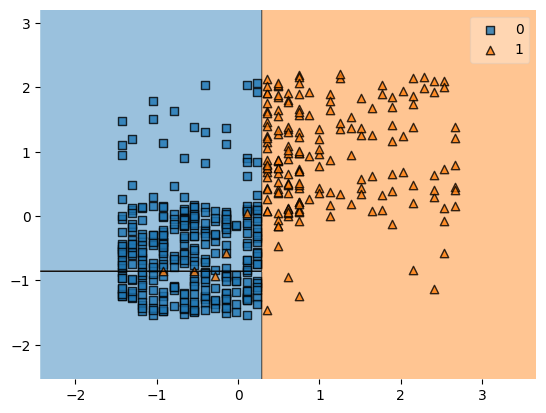

In [25]:
# Visualization of decision region
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dtc)
plt.show()

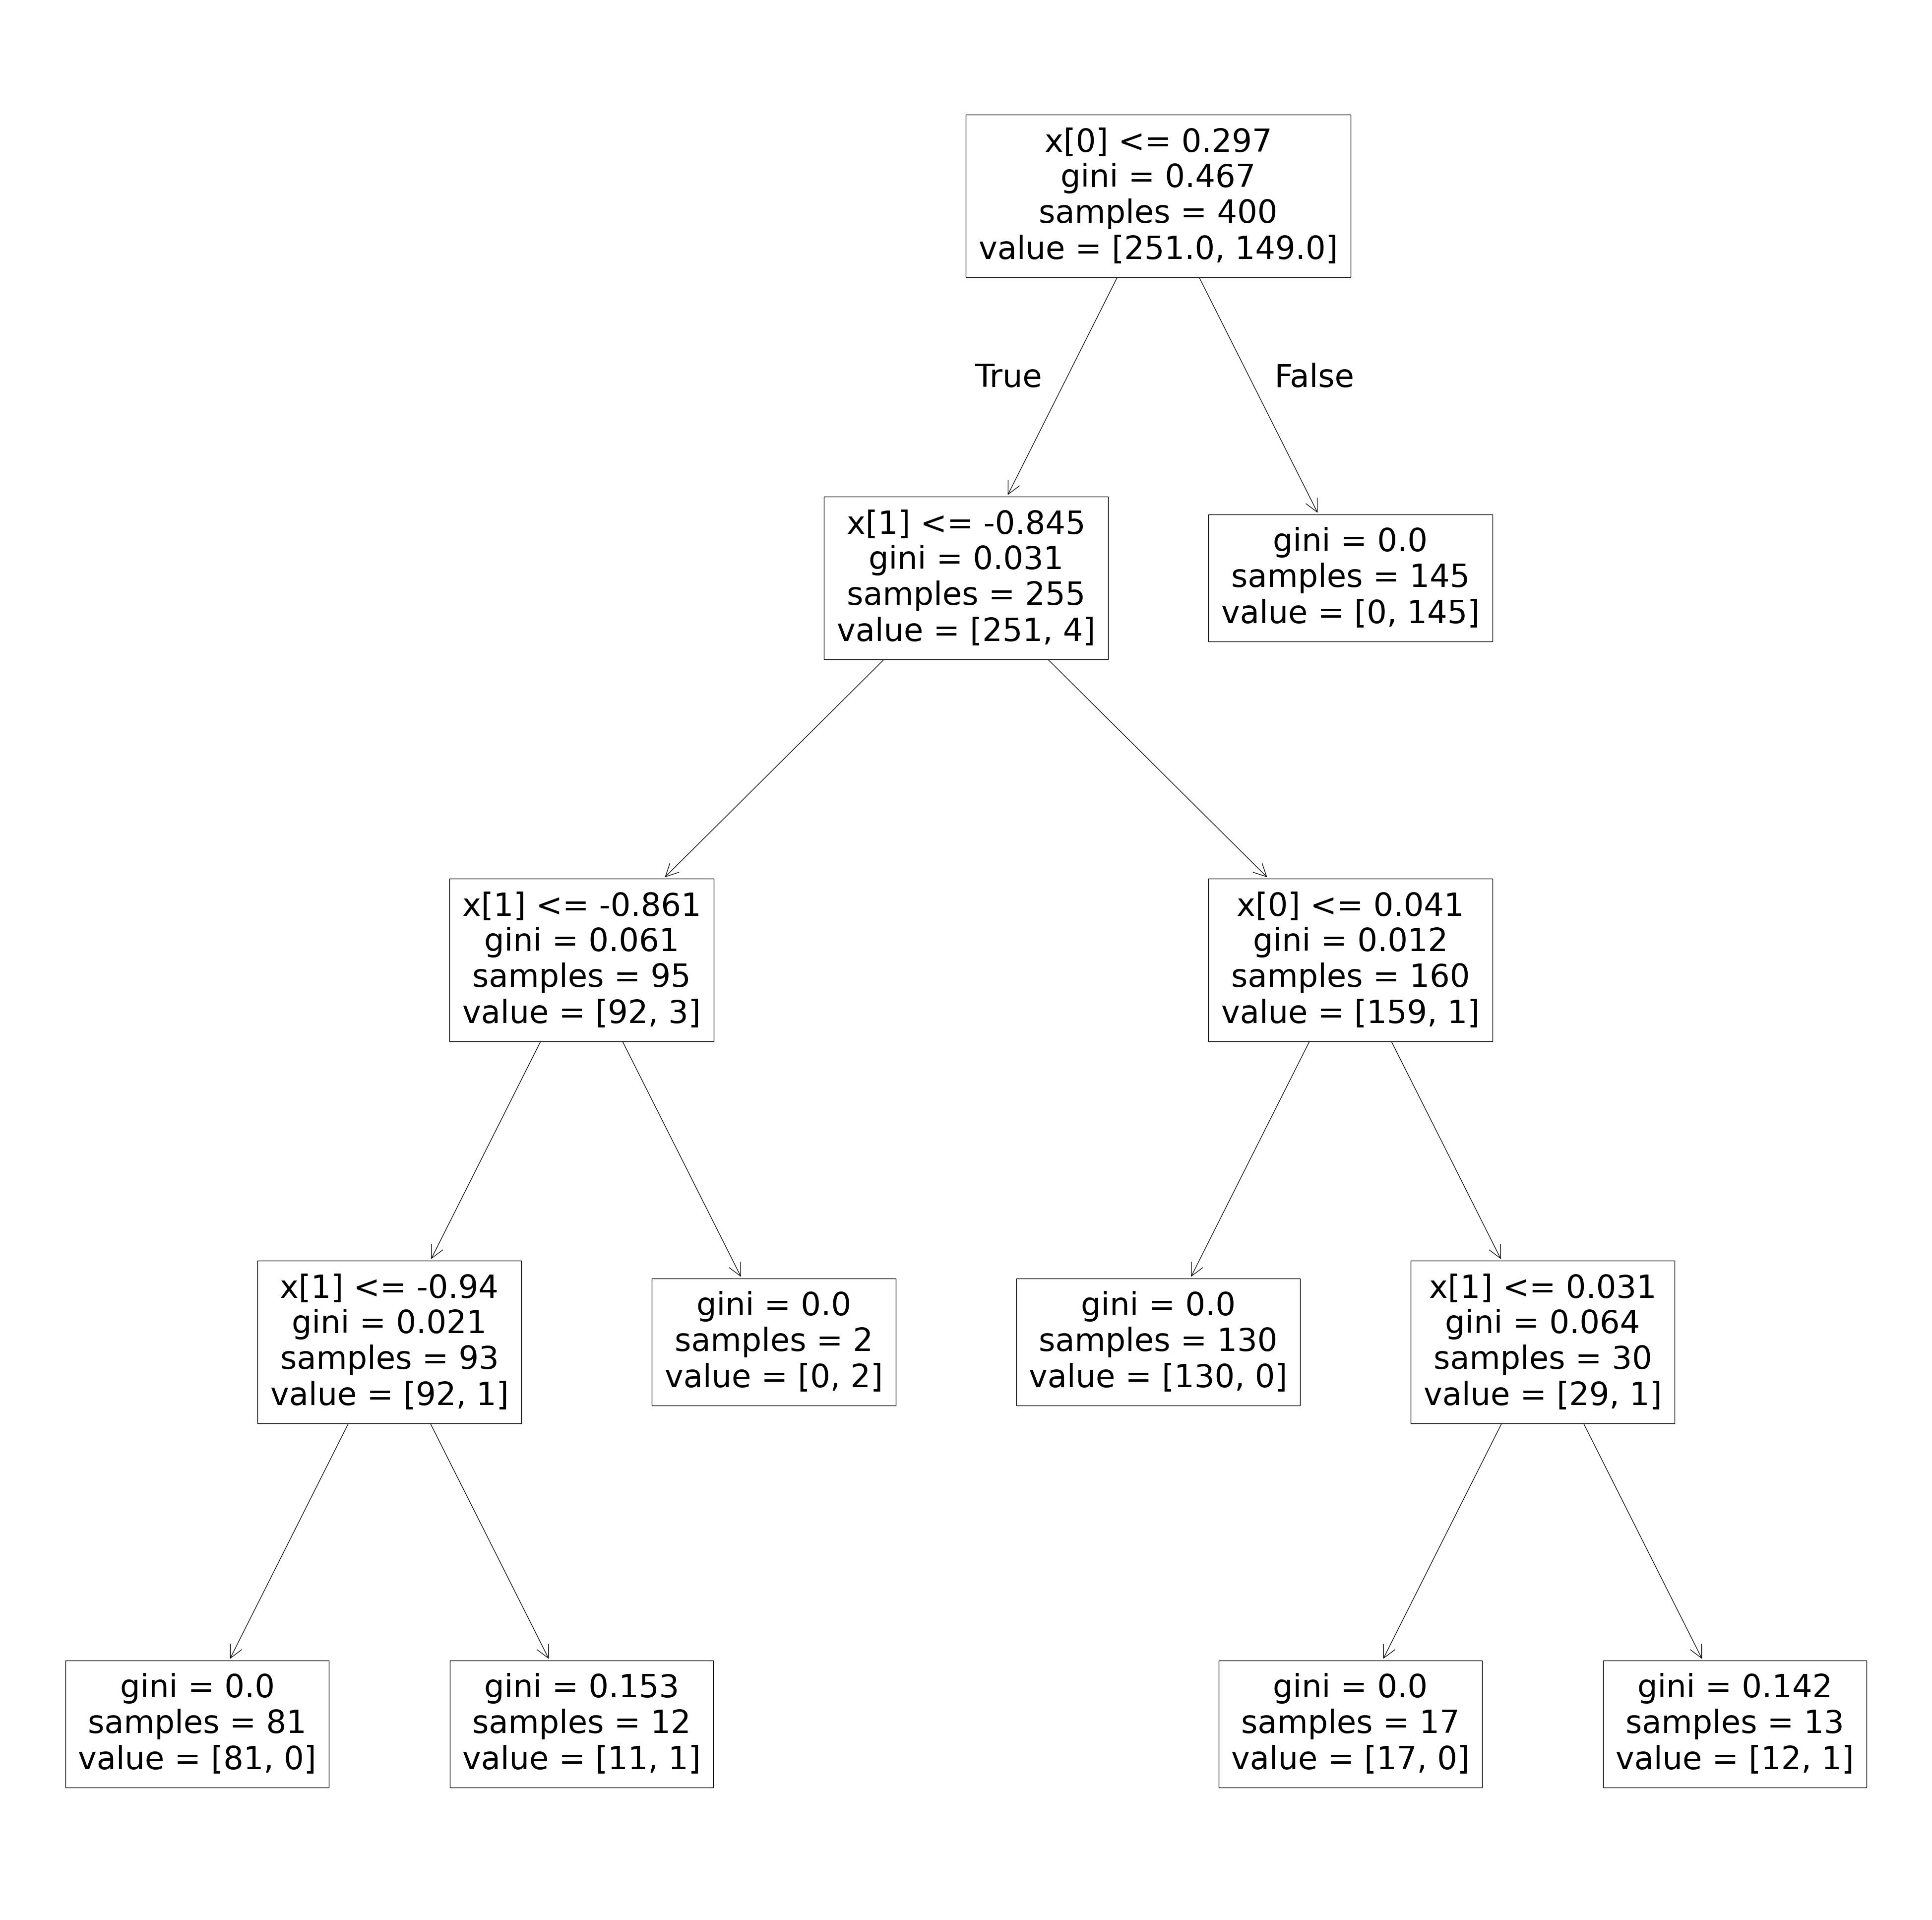

In [26]:
# Visualization of decision tree
plt.figure(figsize=(50, 50))
plot_tree(dtc)
plt.show()